<a href="https://colab.research.google.com/github/Faisalabdulmajid/colabolatory/blob/main/cnn_burung_endemik_indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download file dari google drive**


In [ ]:
!gdown 1TWBMN8q-ZrHoh_eRu2tMhYm4o51J4aXk

Downloading...
From: https://drive.google.com/uc?id=1TWBMN8q-ZrHoh_eRu2tMhYm4o51J4aXk
To: /content/burung_endemik_indonesia.zip
100% 23.8M/23.8M [00:00<00:00, 103MB/s]


**ekstrak file format zip**

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("burung_endemik_indonesia.zip")
zip_ref.extractall()
zip_ref.close()

**membuat folder** untuk data latih, uji, dan validasi, dan mendapatkan nama kelas dari folder

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "burung_endemik_indonesia",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

membuat folder-folder untuk data latih, uji, dan validasi dari gambar burung endemik Indonesia yang ada di direktori burung_endemik_indonesia/. Setelah itu, fungsi akan mengacak daftar file dan membaginya menjadi tiga bagian: latih, uji, dan validasi. Setiap bagian tersebut akan disalin ke folder yang sesuai.

In [ ]:
split_dir_to_train_test_val(directory="burung_endemik_indonesia/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder merpati mahkota biru. Train data copied. 112 files
Folder merpati mahkota biru. Test data copied. 32 files
Folder merpati mahkota biru. Validation data copied. 17 files
Folder jalak bali. Train data copied. 122 files
Folder jalak bali. Test data copied. 35 files
Folder jalak bali. Validation data copied. 18 files
Folder kakatua putih - Google Penelusuran - 25_1_2024 10-51-33. Train data copied. 70 files
Folder kakatua putih - Google Penelusuran - 25_1_2024 10-51-33. Test data copied. 19 files
Folder kakatua putih - Google Penelusuran - 25_1_2024 10-51-33. Validation data copied. 11 files
Folder elang jawa. Train data copied. 149 files
Folder elang jawa. Test data copied. 43 files
Folder elang jawa. Validation data copied. 22 files
Folder cenderawasih raggiana. Train data copied. 183 files
Folder cenderawasih raggiana. Test data copied. 52 files
Folder cenderawasih raggiana. Validation data copied. 27 files
Folder enggang. Train data copied. 89 files
Folder enggang. Test data cop

melakukan pemanggilan untuk mengecek isi direktori

In [ ]:
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['cenderawasih raggiana', 'elang jawa', 'enggang', 'jalak bali',
       'kakatua putih - Google Penelusuran - 25_1_2024 10-51-33',
       'merpati mahkota biru'], dtype='<U55')

impor perpustakaan yang diperlukan untuk memvisualisasikan gambar acak dari direktori dan kelas tertentu

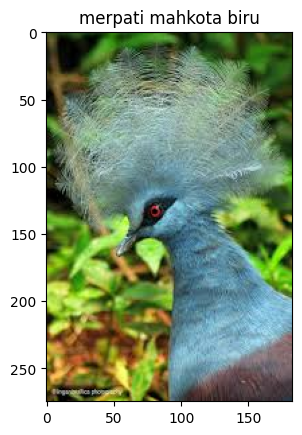

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "merpati mahkota biru")

menyiapkan generator data dan pemuat data untuk pelatihan, validasi, dan pengujian model deep learning menggunakan TensorFlow dan Keras.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

# BATCH_SIZE = 32
# IMG_SIZE = (224, 224)

# train_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/train",
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=IMG_SIZE)

# validation_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/validation",
#                                                                  shuffle=True,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE)

# test_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/test",
#                                                            shuffle=True,
#                                                            batch_size=BATCH_SIZE,
#                                                            image_size=IMG_SIZE)

# batch_size = 32
# img_height = 240
# img_width = 240

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/train",
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/validation",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/test",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

Found 725 images belonging to 6 classes.
Found 207 images belonging to 6 classes.
Found 108 images belonging to 6 classes.


import numpy dari libray

In [ ]:
import numpy as np

# class_names = np.array(train_dataset.class_names)
# print(class_names)

menerapkan normalisasi gambar ke kumpulan data gambar dan label

In [ ]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# train_ds = train_data.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
# val_ds = validation_data.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

mengimpor beberapa class dari tensorflow.keras.layersmodul, yang digunakan untuk mendefinisikan lapisan dalam model jaringan saraf

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input

base_model=tf.keras.applications.Xception(include_top=False, weights="imagenet",input_tensor=Input(shape=(224,224,3)))

83683744/83683744 [==============================] - 1s 0us/step


mencetak ringkasan objek base_model, yang merupakan turunan model Xceptiondari tensorflow.keras.applicationsmodul

In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

Kode base_model.trainable = Falsemenyetel trainableatribut objek base_modelmenjadi False

In [ ]:
base_model.trainable = False

mendefinisikan model jaringan neural menggunakan tf.keras.SequentialAPI dari liblary TensorFlow. Model ini dibuat dengan menumpuk beberapa lapisan yang telah ditentukan sebelumnya dan lapisan khusus di atas satu sama lain.

In [ ]:
model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Dropout(rate=0.5),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='categorical_crossentropy', metrics='accuracy')

mencetak ringkasan model jaringan saraf yang ditentukan dalam cuplikan kode sebelumnya.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          589856    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 6)                 1734      
                                                        

melatih model deep learning menggunakan data gambar dengan menggunakan perpustakaan Keras di Python

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'files/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_data = validation_datagen.flow_from_directory(
    'files/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

history = model.fit(train_data,
                     batch_size=32,
                     epochs=50,
                     steps_per_epoch=len(train_data),
                     validation_data=validation_data)

Found 207 images belonging to 6 classes.
Found 108 images belonging to 6 classes.
Epoch 1/50
7/7 [==============================] - 94s 14s/step - loss: 2.1319 - accuracy: 0.4300 - val_loss: 0.6907 - val_accuracy: 0.7593
Epoch 2/50
7/7 [==============================] - 66s 10s/step - loss: 0.9239 - accuracy: 0.6522 - val_loss: 0.4186 - val_accuracy: 0.8704
Epoch 3/50
7/7 [==============================] - 85s 13s/step - loss: 0.4798 - accuracy: 0.8406 - val_loss: 0.3480 - val_accuracy: 0.8611
Epoch 4/50
7/7 [==============================] - 85s 13s/step - loss: 0.3640 - accuracy: 0.8744 - val_loss: 0.2657 - val_accuracy: 0.9259
Epoch 5/50
7/7 [==============================] - 68s 10s/step - loss: 0.4067 - accuracy: 0.8841 - val_loss: 0.2583 - val_accuracy: 0.9074
Epoch 6/50
7/7 [==============================] - 95s 14s/step - loss: 0.3382 - accuracy: 0.8937 - val_loss: 0.2535 - val_accuracy: 0.9352
Epoch 7/50
7/7 [==============================] - 88s 13s/step - loss: 0.2931 - accu

mengevaluasi performa model pembelajaran mesin terlatih ( model) pada kumpulan data pengujian ( test_data). Metode ini evaluatemenghitung kerugian dan metrik apa pun yang ditentukan saat model dikompilasi, dan mengembalikan nilai-nilai ini sebagai daftar

In [ ]:
model.evaluate(test_data)

7/7 [==============================] - 44s 6s/step - loss: 0.0011 - accuracy: 1.0000


[0.0010753481183201075, 1.0]

 membuat sebuah dictionary yang berisi metric-metric training, seperti loss dan accuracy. DataFrame dibuat dari dictionary tersebut, yang kemudian dipetakan.

<Axes: >

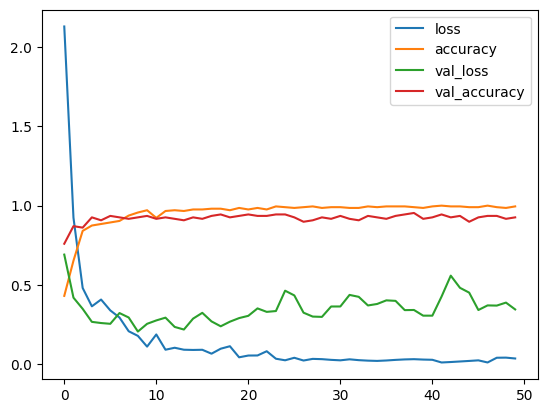

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

memuat dan mengubah ukuran gambar

In [ ]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("files/train/cenderawasih raggiana/1800 (3).jpeg", 224)

membuat prediksi pada gambar menggunakan model pembelajaran mesin terlatih dan mencetak hasilnya




In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 1s 1s/step


array([[9.9999833e-01, 4.8592335e-07, 1.1786174e-06, 3.9516586e-09,
        3.5520271e-09, 8.2957001e-09]], dtype=float32)

mendapatkan label kelas prediksi dari prediksi model untuk sampel masukan pertama

In [ ]:
class_names[pred[0].argmax()]

'cenderawasih raggiana'

In [ ]:
model.save("model.h5")